### Atlantic Exercise 

By Daniel Elkin

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [4]:
%matplotlib inline

In [188]:
def plot_df(df, title, xlab, ylab, ylim=None):
    """
    Helper for the repeated graphing operations below.
    
    Args:
        df - the dataframe to plot
        title - title of the graph
        xlab - label for the x-axis
        ylab - label for the y-axis
        ylim - scale of the y-axis
        
    Returns:
        None
    """

    ax = df.plot(figsize=(10, 5), title=title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
    if ylim:
        ax.set_ylim(ylim)

### I. Data preparation

Create a dataframe from the data, skipping malformed rows and converting the date columns to datetimes.

In [2]:
df = pd.read_csv("data/analyst_hw.tsv",
                     delim_whitespace=True,
                     error_bad_lines=False,
                     header=0, 
                     parse_dates=["visit_date", "publication_date"])


b'Skipping line 249069: expected 7 fields, saw 16\n'
b'Skipping line 626179: expected 7 fields, saw 9\n'
b'Skipping line 1133126: expected 7 fields, saw 22\n'
b'Skipping line 1198292: expected 7 fields, saw 13\nSkipping line 1286414: expected 7 fields, saw 28\n'
b'Skipping line 1783537: expected 7 fields, saw 33\n'
b'Skipping line 1975238: expected 7 fields, saw 17\n'


Inspect the dataframe.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001871 entries, 0 to 2001870
Data columns (total 7 columns):
visitor_id          object
visit_date          datetime64[ns]
visit_hour          int64
url_id              object
site_section        object
publication_date    datetime64[ns]
publication_hour    int64
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 106.9+ MB


In [73]:
df.head()

,visitor_id,visit_date,visit_hour,url_id,site_section,publication_date,publication_hour
0,SNSMrjUkQw/foPv5hRQVpQ==,2018-03-12,17,+VAVDTcwiN39A1wI+AMfAQ==,/technology/,2018-03-12,15
1,7ZmbLaKLEhf0XIVwICyiSA==,2018-03-12,10,2mXxdmD6ysfWw82+9T6OlA==,/business/,2018-02-22,12
2,rGzdTSm1D6K6BEQHOEQ37g==,2018-03-12,17,RJkBuEQLELyj66QjJkg1uA==,/business/,2018-03-11,15
3,3IlL9al+8Gr+ORA5w7oU6Q==,2018-03-12,11,uGrr1+tQEYsPD0t4tJg0rg==,/magazine/,2018-03-06,15
4,sf9ahOgrG7K4yHmnSE/nOg==,2018-03-12,12,uGrr1+tQEYsPD0t4tJg0rg==,/magazine/,2018-03-06,15


The file was parsed correctly and the datetimes were successfully converted. There are over two million rows to analyze.

### II. Data exploration

Inspect the key variables of interest.

In [96]:
cols = ["publication_date", "publication_hour", "visit_date", "visit_hour", "site_section"]
df[cols].describe(include="all")

,publication_date,publication_hour,visit_date,visit_hour,site_section
count,2001871,2.001871e+06,2001871,2.001871e+06,2001871
unique,73,NaN,31,NaN,736
top,2018-02-26 00:00:00,NaN,2018-03-13 00:00:00,NaN,/politics/
freq,350205,NaN,81236,NaN,316348
first,2018-01-15 00:00:00,NaN,2018-03-01 00:00:00,NaN,NaN
last,2018-03-31 00:00:00,NaN,2018-03-31 00:00:00,NaN,NaN
mean,NaN,1.268171e+01,NaN,1.350084e+01,NaN
std,NaN,2.556255e+00,NaN,3.450397e+00,NaN
min,NaN,4.000000e+00,NaN,8.000000e+00,NaN
25%,NaN,1.100000e+01,NaN,1.100000e+01,NaN


We see from the counts that there is complete data for each variable and that we have articles published between mid-January and the end of March 2018 and visitor data for the month of March. 

Politics appears to be the most-visited section, but one oddity is the large number of unique sections. Examining the unique values reveals that sections may not have been extracted correctly from pages that were translated. This may be something we would want to cleanup.

In [117]:
df[df["site_section"].str.contains("translate")].site_section.head()

111      /translate_c?depth=1&hl=hi&nv=1&prev=search&ru...
13518    /translate_c?depth=1&hl=es&prev=search&rurl=tr...
34353    /translate_c?depth=1&hl=fr&rurl=translate.goog...
42651    /translate_c?depth=1&hl=fr&prev=search&rurl=tr...
44604    /translate_c?depth=1&hl=zh-CN&ie=UTF8&prev=_t&...
Name: site_section, dtype: object

For now, we'll examine some of the individual variables in more detail to answer the questions from the prompt.

#### a. Publication hour

We'll first look at the times of day when articles tend to be published. From the table above, we know that articles are published between 4:00am and 8:00pm and that they are on average published at around 1:30pm, but let's visualize the distribution.

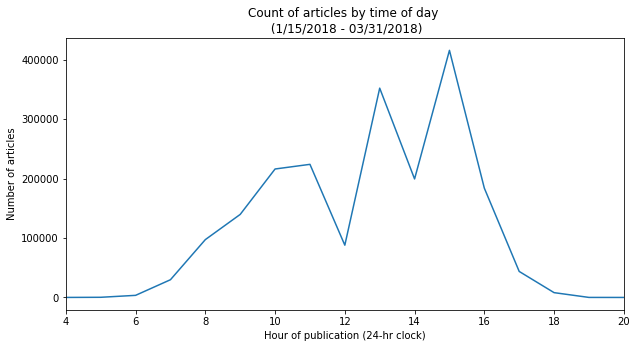

In [190]:
grouped = df.groupby("publication_hour").publication_hour.count()

plot_df(grouped,
        title="Count of articles by time of day \n (1/15/2018 - 03/31/2018)",
        xlab="Hour of publication (24-hr clock)",
        ylab="Number of articles")†

These results look reasonable. Some articles are published in the morning, there is a dip, perhaps for lunch at noon, and then the majority of articles are published in the afternoon. The dip at 2:00pm is somewhat surprising but is perhaps explained by something organization-specific.

#### b. Visit date

Inspect how the visit rate changes over the course of the month.

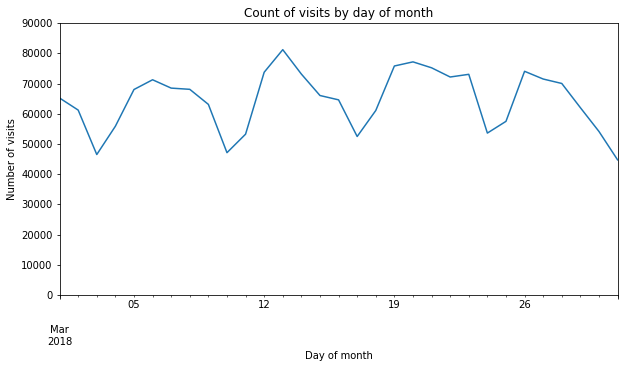

In [192]:
grouped = df.groupby("visit_date").visit_date.count()

plot_df(grouped, 
        title="Count of visits by day of month",
        xlab="Day of month",
        ylab="Number of visits",
        ylim=(0, 90000))

There is some cyclicality visible here, which can probably be attributed to fewer visitors on certain days of the week. Let's see which day of the week corresponds to 3/10, which is one trough in the graph. 

In [122]:
import calendar, datetime
calendar.day_name[datetime.datetime(2018, 3, 10).weekday()]

'Saturday'

Let's also look at total visits for different days of the week.

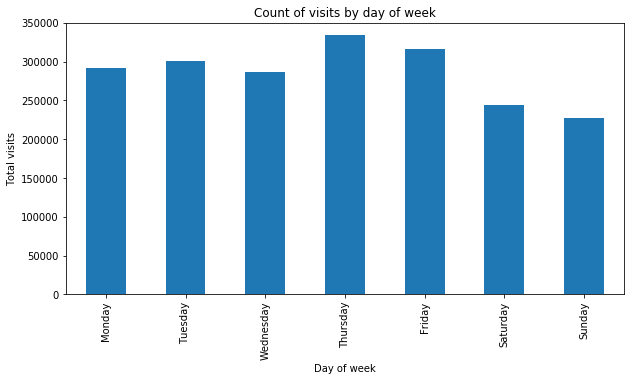

In [129]:
# create a column for the day of the week of the visit
df["publication_day_of_week"] = df.visit_date.dt.day_name()

# group by the day of the week and sort accordingly
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = group_df(df, "publication_day_of_week").reindex(days)

# plot the results
ax = grouped.plot(figsize=(10, 5), 
                  kind="bar", 
                  title="Count of visits by day of week")

ax.set_xlabel("Day of week")
ax.set_ylabel("Total visits")
ax.get_legend().remove()

This graph gives further evidence that there are fewer visits on weekends.

#### c. Visit hour

We'll next look at the time of day at which visits occur.

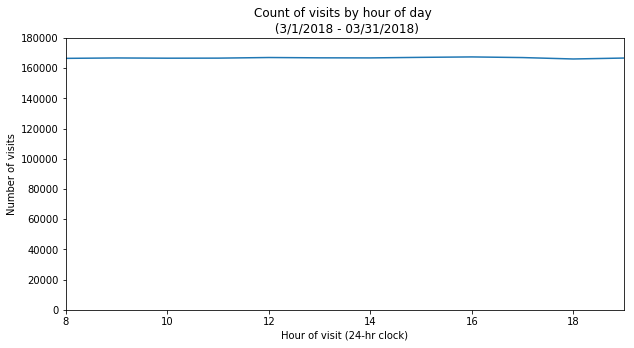

In [282]:
grouped = df.groupby("visit_hour").visit_hour.count()

plot_df(grouped, 
        title="Count of visits by hour of day \n (3/1/2018 - 03/31/2018)",
        xlab="Hour of visit (24-hr clock)",
        ylab="Number of visits",
        ylim=(0, 180000))

This graph is quite surprising. Visits appear to be close to uniformly distributed throughout the day from 8:00am to 9:00pm. We would expect there to be more variability. Let's zoom in to see if there's any movement at all.

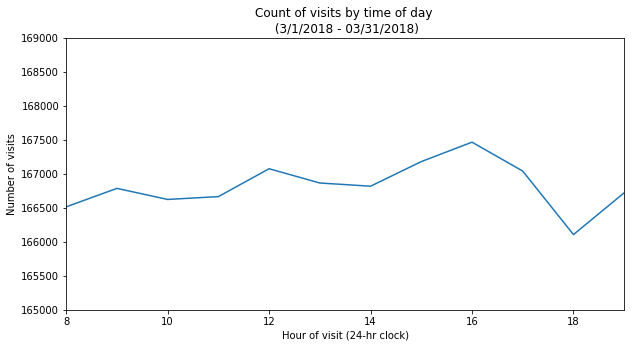

In [283]:
plot_df(grouped, 
        title="Count of visits by time of day \n (3/1/2018 - 03/31/2018)",
        xlab="Hour of visit (24-hr clock)",
        ylab="Number of visits",
        ylim=(165000, 169000))

So we see a change of only about 1,500 visits from the least- to the most-frequently visited times of day. 

Let's look at visits by hour by section of the site to see if there are different distributions by section. Because of the issues with the "site_section" variable noted above, we'll use just the five most popular sections. 

In [284]:
NUM_SITES=5
top_sites = (df
             .groupby("site_section")
             .site_section
             .count()
             .sort_values(ascending=False)[:NUM_SITES])
top_sites

site_section
/politics/         316348
/                  274409
/magazine/         192883
/entertainment/    161599
/health/           129162
Name: site_section, dtype: int64

In [220]:
df_top_sites = df[df["site_section"].isin(
    top_sites.index.get_values())]

len(df_top_sites)

1074401

We now have about half as much data, from sections such as _politics_ and _entertainment_.

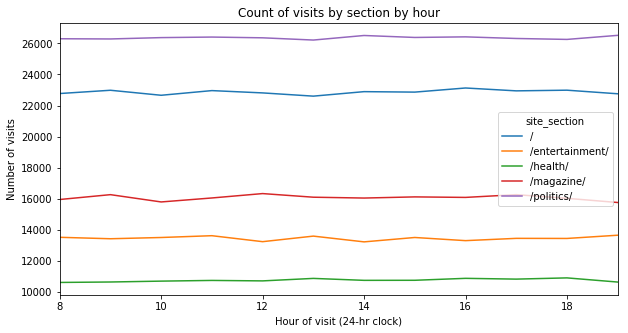

In [281]:
figsize =(10, 5)
title = "Count of visits by section by hour"

ax = (df_top_sites
     .groupby(["site_section", "visit_hour"])
     .visit_hour
     .count()
     .unstack()
     .T
     .plot(figsize=figsize, title=title))

ax.set_xlabel("Hour of visit (24-hr clock)")
_ = ax.set_ylabel("Number of visits")

The number of visits by hour looks to be similar across the most popular sections of the site with little variability.

#### d. Other variables 

In order to explain why the visit rate is so uniform, we'll look at the other variables. For example, perhaps most of the visits happen to be from a bot that has an identical user id and hits the site every minute.

In [292]:
(df
 .groupby("visitor_id")
 .visitor_id
 .count()
 .sort_values(ascending=False)[:10])

visitor_id
O8VQLMsV3chMxy7IIUNgIQ==    1084
MTvOBYs7APNysuFmFNkmnw==     771
l3S6vLosmMb1TizktARkgQ==     652
BRdO+h6dildjjEQcpTnrUw==     619
VYT+YwGPqmqV/TwbSOo8pA==     608
CDB9zVAqvHT+/jEJgkHR2A==     588
8x6HEIJduV8yJJ/rYWQvlw==     581
94s0HBqO0OSgiE61PuUTjQ==     553
4jQMRpYLcY9Y7tfTRJY9iA==     534
U0n9+VEOVBbO3CHwEaYn2w==     514
Name: visitor_id, dtype: int64

The counts for "visitor_id" do not tell us much. We cannot identify a single user that is accounting for the majority of visits. Let's also look at the "url_id".

In [294]:
(df
 .groupby("url_id")
 .url_id
 .count()
 .sort_values(ascending=False)[:10])

url_id
uT9bBIVeFPRblAs978g+fQ==    274409
IuXaKC7+qw6rG0cFbB4rNA==     48713
uGrr1+tQEYsPD0t4tJg0rg==     34360
52SRjAfHy+aJM38iGxX/ag==     13956
48Gtp8joeNWBKIePUgp/ng==     13263
R41RAvVrziLi8M6Wi0kk0A==     12775
HS+VgYmeFPepUqBuU+zg/A==     12396
YQuZMKM41R5i+EgfXc1X3A==     11479
HlLULhSr7eCaG/w8k2/vow==     11179
qeZDUs7n+KrmPk57NNzrrg==      9830
Name: url_id, dtype: int64

The counts for the "url_id" also do not shed much light on the problem. There are a few unusually popular URLs (possibly corresponding to the homepage), but it is hard to see how these would explain the uniform visit rate.

### III. Further Work

TODO: publication vs visit